In [19]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


class params:
    sigma = 10
    rho = 28
    beta = 8/3

%matplotlib widget


In [37]:
def dsdt(state, t, sigma, rho, beta):
    x, y, z = state

    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z

    return [dx, dy, dz]
    

In [46]:
def euler_solver(func, state, dt=0.01, t_end=1, args=()):
    t = 0
    steps = int(t_end / dt)
    state = np.array(state)
    states = [state]
    for _ in range(steps):
        t += dt
        #print(state)
        ds = np.array(func(state, t, *args)) * dt
        state = np.add(state, ds)
        states.append(state)
    
    return np.array(states)
    


In [47]:
euler_solver(dsdt, [1.0, 1.0, 1.0], dt=0.001, t_end=25.0, args=(params.sigma, params.rho, params.beta))

array([[  1.        ,   1.        ,   1.        ],
       [  1.        ,   1.026     ,   0.99833333],
       [  1.00026   ,   1.05197567,   0.99669711],
       ...,
       [ -9.66156717, -16.68056214,  16.30504614],
       [ -9.73175712, -16.77687316,  16.42272638],
       [ -9.80220828, -16.8727635 ,  16.5422009 ]])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
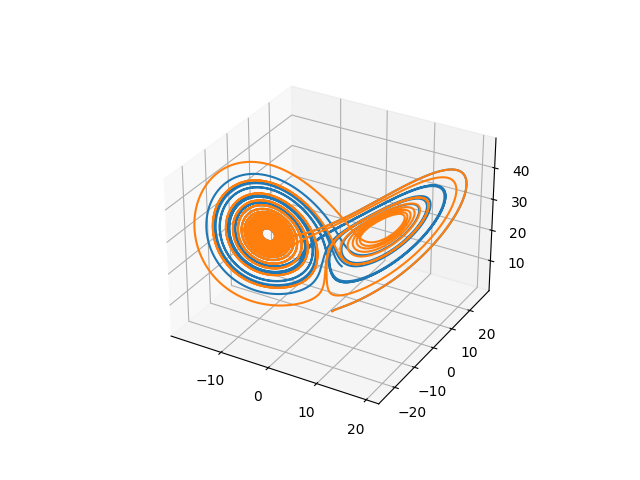

In [48]:
t = np.arange(0.0, 50.0, 0.01)
dt = 0.001
states = [
    [0.9, 1.0, 1.0],
    [1.001, 1.0, 1.0]
]

systems = []
for state in states:
    #sol = odeint(dsdt, state, t, args=(params.sigma, params.rho, params.beta))
    sol = euler_solver(dsdt, state, dt=0.001, t_end=25.0, args=(params.sigma, params.rho, params.beta))
    systems.append(sol.T)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for system in systems:
    ax.plot(system[0], system[1], system[2])


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
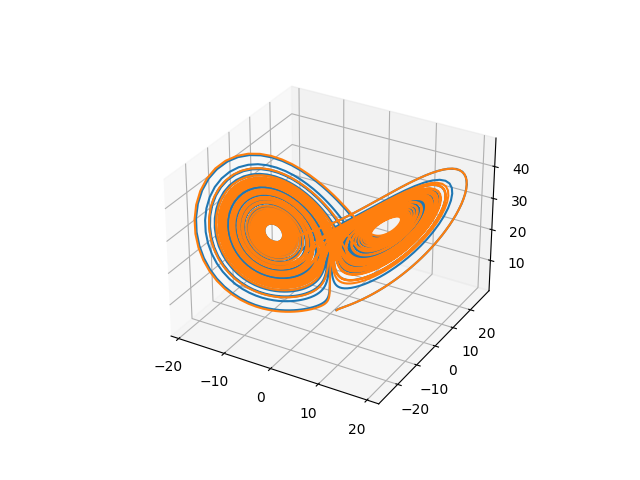